In [ ]:
error_planck_dir = "/Users/bellamarco01/uni/1_master_thesis/error_Planck"
datasets = ['Planck2018_errorTT.txt','Planck2018_errorTE.txt','Planck2018_errorEE.txt']
import numpy as np
import matplotlib.pyplot as plt
import os

# directory and file
error_planck_dir = "/Users/bellamarco01/uni/1_master_thesis/error_Planck"
tt_file = datasets[0]
tt_path = os.path.join(error_planck_dir, tt_file)

# load data (skips lines starting with # automatically)
data = np.loadtxt(tt_path)

# columns
ell_data = data[:, 0]
Dl = data[:, 1]
Dl_err_minus = data[:, 2]
Dl_err_plus = data[:, 3]

# symmetric error (they are equal here anyway)
Dl_err = Dl_err_plus
print(ell_data)

matters of binning


In [ ]:
error_planck_dir = "/Users/bellamarco01/uni/1_master_thesis/error_Planck"
datasets = ['Planck2018_errorTT.txt','Planck2018_errorTE.txt','Planck2018_errorEE.txt']
import numpy as np
import matplotlib.pyplot as plt
import os

# directory and file
error_planck_dir = "/Users/bellamarco01/uni/1_master_thesis/error_Planck"
tt_file = datasets[0]
tt_path = os.path.join(error_planck_dir, tt_file)

# load data (skips lines starting with # automatically)
data = np.loadtxt(tt_path)

# columns
ell_data = data[:, 0]
Dl = data[:, 1]
Dl_err_minus = data[:, 2]
Dl_err_plus = data[:, 3]

# symmetric error (they are equal here anyway)
Dl_err = Dl_err_plus
print(ell_data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# directory and file
error_planck_dir = "/Users/bellamarco01/uni/1_master_thesis/error_Planck"
tt_file = datasets[0]
tt_path = os.path.join(error_planck_dir, tt_file)

# load data (skips lines starting with # automatically)
data = np.loadtxt(tt_path)

# columns
ell_data = data[:, 0]
Dl = data[:, 1]
Dl_err_minus = data[:, 2]
Dl_err_plus = data[:, 3]

# symmetric error (they are equal here anyway)
Dl_err = Dl_err_plus

# plot
plt.figure(figsize=(8,5))
plt.errorbar(
    ell_data, Dl,
    yerr=Dl_err,
    fmt='o',
    markersize=3,
    elinewidth=1,
    capsize=2,
    label='Planck 2018 TT'
)
plt.plot(ell, D_ell_0)

plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell^{TT}$')
plt.title('Planck 2018 TT Power Spectrum (errors)')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
from classy import Class
import numpy as np
LambdaCDM = Class()

# 1807.06209 table 2, TT,TE,EE+lowE+lensing 
LambdaCDM.set({'omega_b':0.02237,
               'omega_cdm':0.1200,
            #    '100theta_s':1.04110,
               'H0':67.36,
               'ln10^{10}A_s':3.044,
               'n_s':0.9649,
               'tau_reio':0.0544,
               'N_mscf':0,
               "do_shooting": "no",
               }
               )

# https://hal.science/hal-04231374/file/aa48015-23.pdf
# LambdaCDM.set({'omega_b':0.02226,
#                'omega_cdm':0.1188,
#             #    '100theta_s':1.04110,
#                'H0':67.64,
#                'ln10^{10}A_s':3.040,
#                'n_s':0.9681,
#                'tau_reio':0.0580,
#                'N_mscf':0,
#                "do_shooting": "no",
#                }
#                )



LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes'})

LambdaCDM.compute()
bg = LambdaCDM.get_background()

cl_tot_0 = LambdaCDM.lensed_cl(2500)
ell = cl_tot_0['ell']
cl_tt_0 = cl_tot_0['tt']
T_cmb = 2.725
T_uK = T_cmb*1e6
D_ell_0 = ell*(ell+1)/(2*np.pi) * cl_tt_0 * T_uK**2




# evaluate at Planck ell's
# Dl_0 = Dl_0_interp(ell_data)

import numpy as np

ell_c = ell_data
edges = np.zeros(len(ell_c) + 1)

# interior edges = midpoints
edges[1:-1] = 0.5 * (ell_c[1:] + ell_c[:-1])

# first edge (extrapolate)
edges[0] = ell_c[0] - (edges[1] - ell_c[0])

# last edge (extrapolate)
edges[-1] = ell_c[-1] + (ell_c[-1] - edges[-2])

print(edges)

from scipy.interpolate import interp1d

# build interpolator
Dl_0_interp = interp1d(
    ell,
    D_ell_0,
    kind='linear',
    bounds_error=False,
    fill_value='extrapolate'
)
from scipy.integrate import quad

def bin_integrated(Dl, lmin, lmax):
    val, _ = quad(Dl, lmin, lmax)
    return val / (lmax - lmin)

Dl_binned_0 = np.array([
    bin_integrated(Dl_0_interp, edges[i], edges[i+1])
    for i in range(len(ell_c))
])
residuals = (Dl_binned_0 - Dl )/ Dl_binned_0
plt.errorbar(
    ell_data, residuals,
    yerr=Dl_err/Dl_binned_0,
    fmt='o',
    markersize=3,
    elinewidth=1,
    capsize=2,
    label='Planck 2018 TT'
)
plt.ylim(-.05,.05)

In [ ]:
def extract_bf(bf_file):
    bf_z = []
    bf_fEDE = []
    bf_H =[]
    bf_ell = []
    bf_cl_tt = []

    data = np.load(str(bf_file))
    bf_z= (data["z"])
    bf_fEDE= (data["f_EDE"])
    bf_H= (data["H"])
    bf_ell= (data["ell"])
    bf_cl_tt= (data["cl_tt"])
    D_tt_bf = np.array(bf_ell*(bf_ell+1)*bf_cl_tt/(2*np.pi))*T_uK**2
    return bf_ell, D_tt_bf
data_dirs = ["/Users/bellamarco01/uni/1_master_thesis/tools/output_remote/mini_reconstruction_tool/1pd/output_class/", 
             "/Users/bellamarco01/uni/1_master_thesis/tools/output_remote/mini_reconstruction_tool/1psd/output_class/",
             "/Users/bellamarco01/uni/1_master_thesis/tools/output_remote/mini_reconstruction_tool/2pd/output_class/", 
             "/Users/bellamarco01/uni/1_master_thesis/tools/output_remote/mini_reconstruction_tool/2psd/output_class/"]

data_dir = "/Users/bellamarco01/uni/1_master_thesis/tools/output_remote/mini_reconstruction_tool/1pd/output_class/" 
bf_file = data_dir+ "bestfit.npz"
ell_bf, D_tt_bf = extract_bf(bf_file)
plt.errorbar(
    ell_data, Dl,
    yerr=Dl_err,
    fmt='o',
    markersize=3,
    elinewidth=1,
    capsize=2,
    label='Planck 2018 TT'
)
# build interpolator
Dl_bf_interp = interp1d(
    ell_bf,
    D_tt_bf,
    kind='linear',
    bounds_error=False,
    fill_value='extrapolate'
)

# evaluate at Planck ell's
Dl_bf_small = Dl_bf_interp(ell_data)
plt.plot(ell_data, Dl_bf_small)
plt.plot(ell, D_tt_bf)
plt.xlim(0,100)


In [ ]:
# build interpolator

Dl_bf_interp = interp1d(
    ell_bf,
    D_tt_bf,
    kind='linear',
    bounds_error=False,
    fill_value='extrapolate'
)

# evaluate at Planck ell's
Dl_bf_small = Dl_bf_interp(ell_data)

residuals = (Dl_bf_small - Dl )/ Dl
plt.errorbar(
    ell_data, residuals,
    yerr=Dl_err/Dl,
    fmt='o',
    markersize=3,
    elinewidth=1,
    capsize=2,
    label='Planck 2018 TT'
)
plt.ylim(-.05,.05)
print(residuals*Dl)

# Npipe 

(-40.0, 40.0)

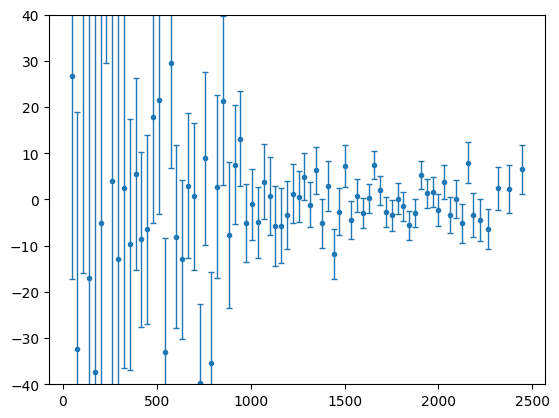

In [79]:
import numpy as np

# load the data
filename = "/Users/bellamarco01/uni/1_master_thesis/error_Planck_2020/TT_residuals.dat"
data = np.loadtxt(filename, usecols=[1,2,3,4,5],skiprows=1)

# print(data)
# columns
lmean  = data[:,0]
lmin   = data[:,1]
lmax   = data[:,2]
NPIPE_res = data[:,3]
NPIPE_err = data[:,4]
# Plik_res  = data[:,5]
# Plik_err  = data[:,6]

plt.errorbar(lmean,NPIPE_res, yerr=NPIPE_err,
        fmt='o',
        markersize=3,
        elinewidth=1,
        capsize=2,
        label='Planck 2018 TT')
plt.ylim([-40,40])
# print(NPIPE_res)

In [81]:
from classy import Class
import numpy as np
LambdaCDM = Class()
# 1807.06209 table 2, TT,TE,EE+lowE+lensing 
# LambdaCDM.set({'omega_b':0.02237,
#                'omega_cdm':0.1200,
#             #    '100theta_s':1.04110,
#                'H0':67.36,
#                'ln10^{10}A_s':3.044,
#                'n_s':0.9649,
#                'tau_reio':0.0544,
#                'N_mscf':0,
#                "do_shooting": "no",
#                }
            #    )

# https://hal.science/hal-04231374/file/aa48015-23.pdf
LambdaCDM.set({'omega_b':0.02218,
               'omega_cdm':0.1197,
            #    '100theta_s':1.04110,
               'H0':67.26,
               'ln10^{10}A_s':3.035,
               'n_s':0.9635,
               'tau_reio':0.0517,
               'N_mscf':0,
               "do_shooting": "no",
               }
               )



LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes'})

LambdaCDM.compute()
bg = LambdaCDM.get_background()


cl_tot_0 = LambdaCDM.lensed_cl(2500)

ell = cl_tot_0['ell']
cl_tt_0 = cl_tot_0['tt']
T_cmb = 2.725
T_uK = T_cmb*1e6
D_ell_0 = ell*(ell+1)/(2*np.pi) * cl_tt_0 * T_uK**2

NPTS = 500  # choose 100, 200, 300… depending on how small you want the file

D_tt_0_interp = interp1d(
   ell,
   D_ell_0,
   kind='linear',
   bounds_error=False,
   fill_value='extrapolate'
)

# Dl_binned = np.array([
#     bin_integrated(D_tt_interp, edges[i], edges[i+1])
#     for i in range(len(ell_c))
# ])
# residuals = (Dl_binned - Dl )/ Dl_binned_0

# evaluate at Planck ell's
Dl_small_0 = D_tt_0_interp(lmean)

Dl_2020 = (Dl_small_0 + NPIPE_res)


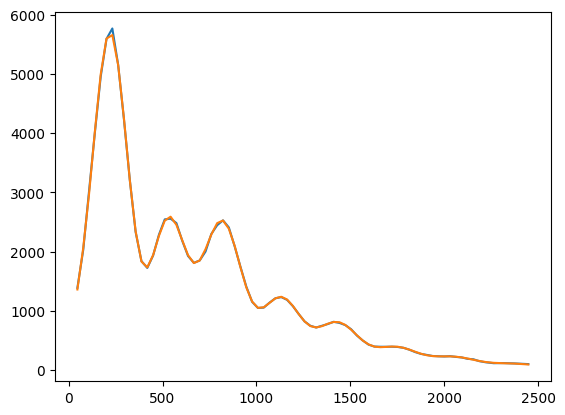